In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import numpy as np
import pandas as pd

from disCap import disCap
from disCap import stockData

investments = stockData.investments
stock_description = stockData.stock_description

# cryptocurrencies are not available in Yahoo.  These are retrieved as a 
# one-off from messari API
specialvalues = {
     'eth': disCap.retrieve_current_cryptocoin_price('eth')
    ,'btc': disCap.retrieve_current_cryptocoin_price('btc')
    }
print(specialvalues)
investments_df = disCap.investmentsAs_df(investments, specialvalues)
stockDescription_df = disCap.stockDescriptionAs_df(stock_description)

{'eth': 1619.5318607298489, 'btc': 50557.38119241388}


In [30]:
investments_df.head(5)

,keydates,symbol,datestamp,invested,shares,close
0,OKTA:2020.05.20,OKTA,2020.05.20,250.0,1.33192,269.899994
1,ADBE:2020.06.05,ADBE,2020.06.05,250.0,0.63630,476.619995
2,ADBE:2020.06.22,ADBE,2020.06.22,80.0,0.18239,476.619995
3,ADBE:2021.01.05,ADBE,2021.01.05,450.0,0.92652,476.619995
4,AMZN:2020.03.10,AMZN,2020.03.10,250.0,0.13730,3159.530029


In [31]:
stockDescription_df.head(5)

,symbol,area,sector
0,AMD,US,"Tech, Semiconductors"
1,PYPL,US,"Tech, Fintech"
2,OKTA,US,"Tech, Security"
3,AMZN,US,"Virtual Marketplace, Cloud Services"
4,APPN,US,"Tech, Business Processes"


Red at gain = 0.8729623905303955.
Changes linear to yellow at 1.4230706409858844.
From 1.4230706409858844 to 3.925183428955078 is green blue shift


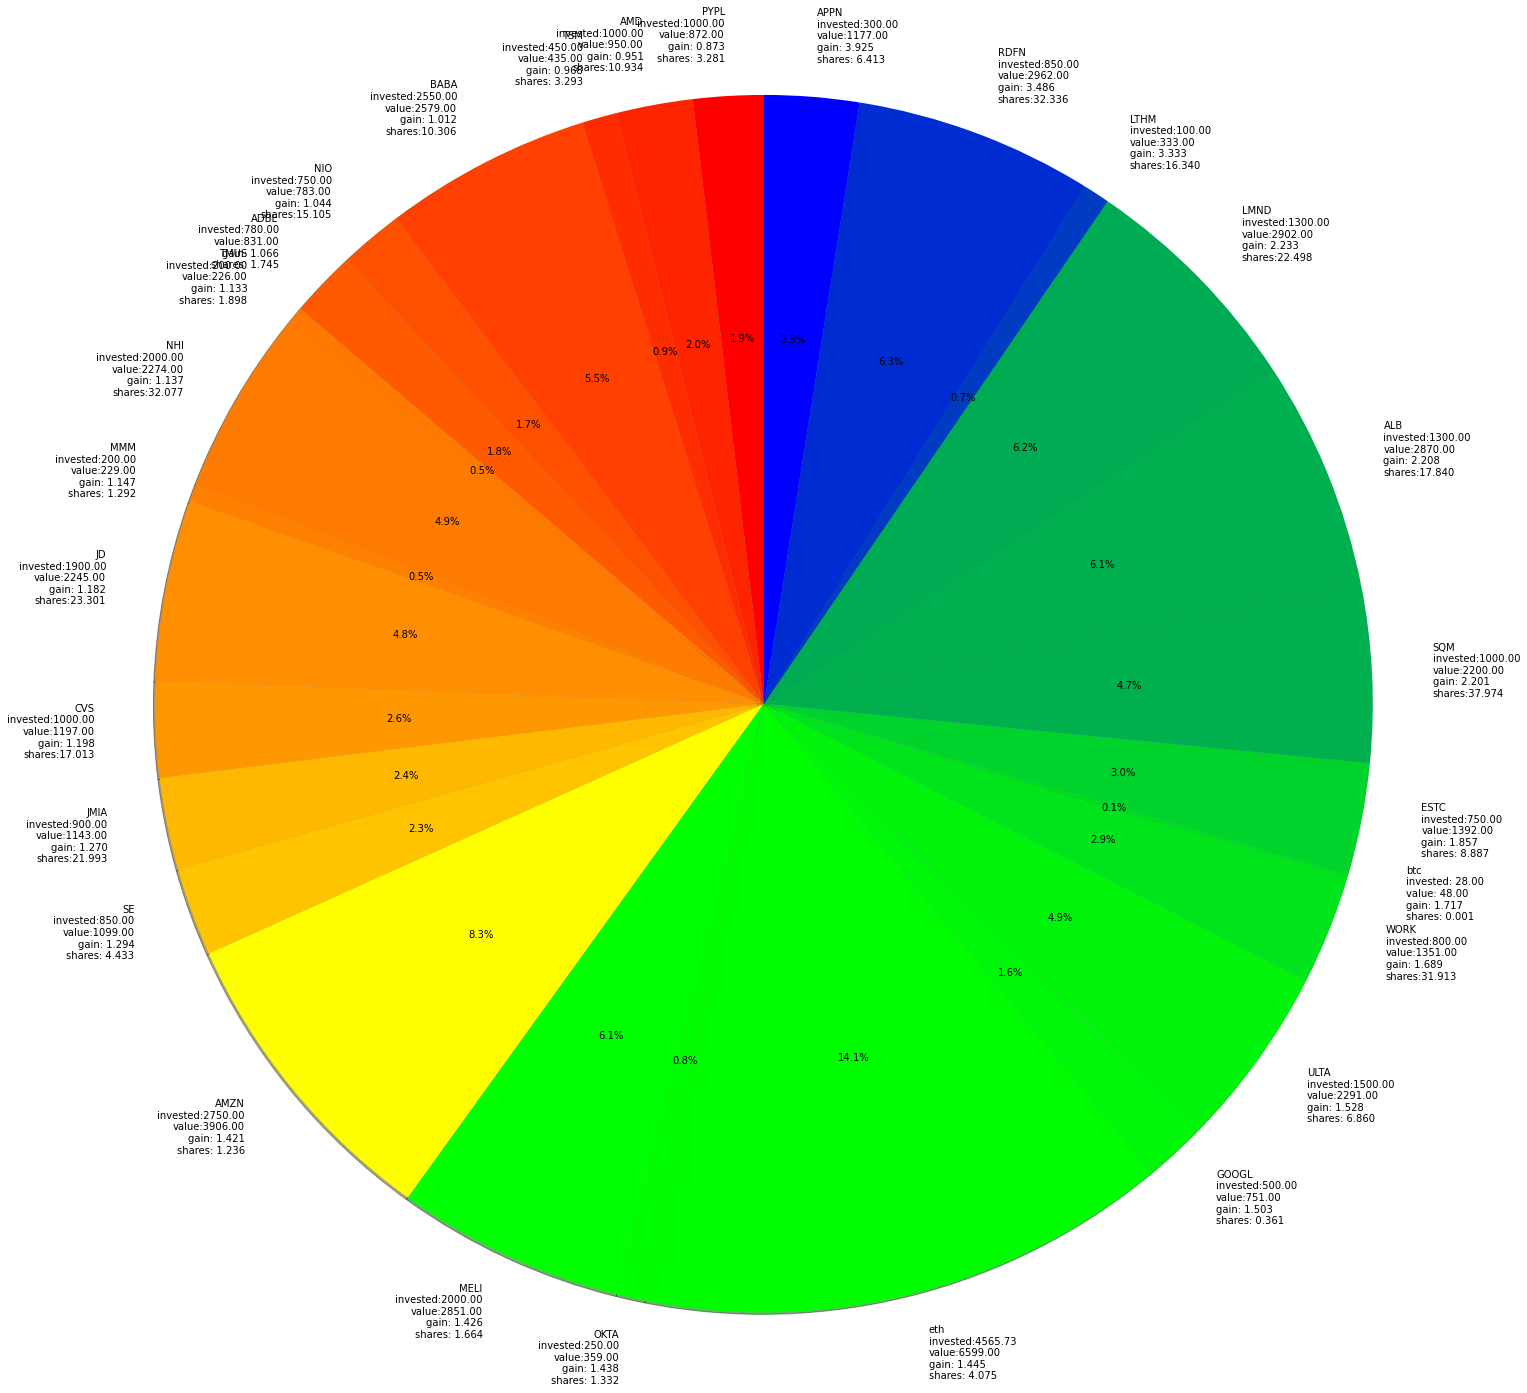



Total Invested:		31573.73
Total Value:		46871.34
Total Gain %:		  1.48


In [32]:
# make a Pie chart.
# data is sorted by gain per stock
# color from minimum to 1.0 red to yellow
# color from 1.00 to max green to blue

df, total_invested, total_value = disCap.todayValueAs_df(investments_df)

fig1, ax1 = plt.subplots()
df = df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
red_point = min( min(df.gain), 0.95)
blue_point = max( max(df.gain), 3)
green_point = 1.100

red_point = min(df.gain)
blue_point = max(df.gain)
green_point = np.median( df.gain )

print('Red at gain = {}.\nChanges linear to yellow at {}.\nFrom {} to {} is green blue shift'.\
      format(red_point, green_point, green_point, blue_point))

label_ = list( map( disCap.mklab, df.symbol, df.invested, df.value, df.gain, df.shares) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

print('\n\nTotal Invested:\t\t{0:6.2f}\nTotal Value:\t\t{1:6.2f}\nTotal Gain %:\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))

In [33]:
fields = ['symbol','gain','invested','value','shares','percentage_value','close','effective_share_price']
df['percentage_value'] = df['percentage_value'] * 100.00
df[fields].head(30)

,symbol,gain,invested,value,shares,percentage_value,close,effective_share_price
18,PYPL,0.872962,1000.00,872.962391,3.280950,1.862465,266.070007,304.789771
2,AMD,0.950580,1000.00,950.580252,10.933750,2.028063,86.940002,91.459929
23,TSM,0.968098,450.00,435.644065,3.292850,0.929447,132.300003,136.659732
5,BABA,1.011726,2550.00,2579.901363,10.305590,5.504219,250.339996,247.438526
16,NIO,1.044491,750.00,783.368128,15.105440,1.671316,51.860001,49.650987
0,ADBE,1.066413,780.00,831.801982,1.745210,1.774649,476.619995,446.937618
22,TMUS,1.133036,200.00,226.607111,1.898200,0.483466,119.379997,105.362975
15,NHI,1.137290,2000.00,2274.579478,32.076990,4.852815,70.910004,62.349990
14,MMM,1.147339,200.00,229.467769,1.291830,0.489569,177.630005,154.819133
9,JD,1.181852,1900.00,2245.519361,23.301020,4.790815,96.370003,81.541495


In [34]:
df = df.sort_values(by=['invested'])
df['percentage_invested'] = df['invested']/total_invested
df['gamma'] = df['percentage_value']/df['percentage_invested']
fields = ['symbol','gain','gamma','percentage_invested','invested','value','shares','percentage_value','close','effective_share_price']
df[fields].head(30)

,symbol,gain,gamma,percentage_invested,invested,value,shares,percentage_value,close,effective_share_price
26,btc,1.717344,115.684663,0.000887,28.00,48.085631,0.000951,0.102591,50557.381192,29439.286728
12,LTHM,3.333333,224.541829,0.003167,100.00,333.333342,16.339870,0.711167,20.400000,6.120000
22,TMUS,1.133036,76.324161,0.006334,200.00,226.607111,1.898200,0.483466,119.379997,105.362975
14,MMM,1.147339,77.287667,0.006334,200.00,229.467769,1.291830,0.489569,177.630005,154.819133
17,OKTA,1.437941,96.863354,0.007918,250.00,359.485200,1.331920,0.766962,269.899994,187.698961
4,APPN,3.925183,264.410353,0.009502,300.00,1177.555029,6.413000,2.512313,183.619995,46.779978
23,TSM,0.968098,65.213542,0.014252,450.00,435.644065,3.292850,0.929447,132.300003,136.659732
8,GOOGL,1.503136,101.255039,0.015836,500.00,751.567774,0.360670,1.603470,2083.810059,1386.308814
16,NIO,1.044491,70.359563,0.023754,750.00,783.368128,15.105440,1.671316,51.860001,49.650987
7,ESTC,1.856747,125.075181,0.023754,750.00,1392.559966,8.886790,2.971026,156.699997,84.394928


In [35]:
df = df.sort_values(by=['percentage_value'])
df['percentage_invested'] = df['invested']/total_invested
df['gamma'] = df['percentage_value']/df['percentage_invested']
fields = ['symbol','gain','gamma','percentage_invested','invested','value','shares','percentage_value','close','effective_share_price']
df[fields].head(30)

,symbol,gain,gamma,percentage_invested,invested,value,shares,percentage_value,close,effective_share_price
26,btc,1.717344,115.684663,0.000887,28.00,48.085631,0.000951,0.102591,50557.381192,29439.286728
22,TMUS,1.133036,76.324161,0.006334,200.00,226.607111,1.898200,0.483466,119.379997,105.362975
14,MMM,1.147339,77.287667,0.006334,200.00,229.467769,1.291830,0.489569,177.630005,154.819133
12,LTHM,3.333333,224.541829,0.003167,100.00,333.333342,16.339870,0.711167,20.400000,6.120000
17,OKTA,1.437941,96.863354,0.007918,250.00,359.485200,1.331920,0.766962,269.899994,187.698961
23,TSM,0.968098,65.213542,0.014252,450.00,435.644065,3.292850,0.929447,132.300003,136.659732
8,GOOGL,1.503136,101.255039,0.015836,500.00,751.567774,0.360670,1.603470,2083.810059,1386.308814
16,NIO,1.044491,70.359563,0.023754,750.00,783.368128,15.105440,1.671316,51.860001,49.650987
0,ADBE,1.066413,71.836282,0.024704,780.00,831.801982,1.745210,1.774649,476.619995,446.937618
18,PYPL,0.872962,58.804970,0.031672,1000.00,872.962391,3.280950,1.862465,266.070007,304.789771


In [36]:
df = df.sort_values(by=['last_investment'])
fields = ['symbol','gain','invested','value','shares','percentage_value','close',
          'effective_share_price','first_investment','last_investment']
df[fields].head(30)

,symbol,gain,invested,value,shares,percentage_value,close,effective_share_price,first_investment,last_investment
4,APPN,3.925183,300.00,1177.555029,6.413000,2.512313,183.619995,46.779978,2020.02.22,2020.02.22
8,GOOGL,1.503136,500.00,751.567774,0.360670,1.603470,2083.810059,1386.308814,2020.02.28,2020.02.28
19,RDFN,3.485847,850.00,2962.969582,32.336240,6.321495,91.629997,26.286297,2020.03.05,2020.03.10
25,WORK,1.689421,800.00,1351.536676,31.913500,2.883503,42.349998,25.067761,2020.02.22,2020.03.10
12,LTHM,3.333333,100.00,333.333342,16.339870,0.711167,20.400000,6.120000,2020.03.11,2020.03.11
21,SQM,2.200957,1000.00,2200.957356,37.973730,4.695742,57.959999,26.333995,2020.03.03,2020.03.11
1,ALB,2.208057,1300.00,2870.473590,17.840110,6.124155,160.899994,72.869506,2020.02.22,2020.04.04
17,OKTA,1.437941,250.00,359.485200,1.331920,0.766962,269.899994,187.698961,2020.05.20,2020.05.20
3,AMZN,1.420513,2750.00,3906.411333,1.236390,8.334328,3159.530029,2224.217278,2020.03.10,2020.06.18
14,MMM,1.147339,200.00,229.467769,1.291830,0.489569,177.630005,154.819133,2020.07.07,2020.07.07


In [37]:
dfx = df.merge( stockDescription_df, on='symbol',how='left')

sector_df = dfx[['sector','invested','value']].groupby('sector').agg('sum').reset_index()
total = sum( sector_df['value'] )
sector_df['gain'] = sector_df['value']/sector_df['invested']
sector_df['percentage_value'] = 100.00*sector_df['value']/total

area_df = dfx[['area','invested','value']].groupby('area').agg('sum').reset_index()
total = sum( area_df['value'] )
area_df['gain'] = area_df['value']/area_df['invested']
area_df['percentage_value'] = 100*area_df['value']/total

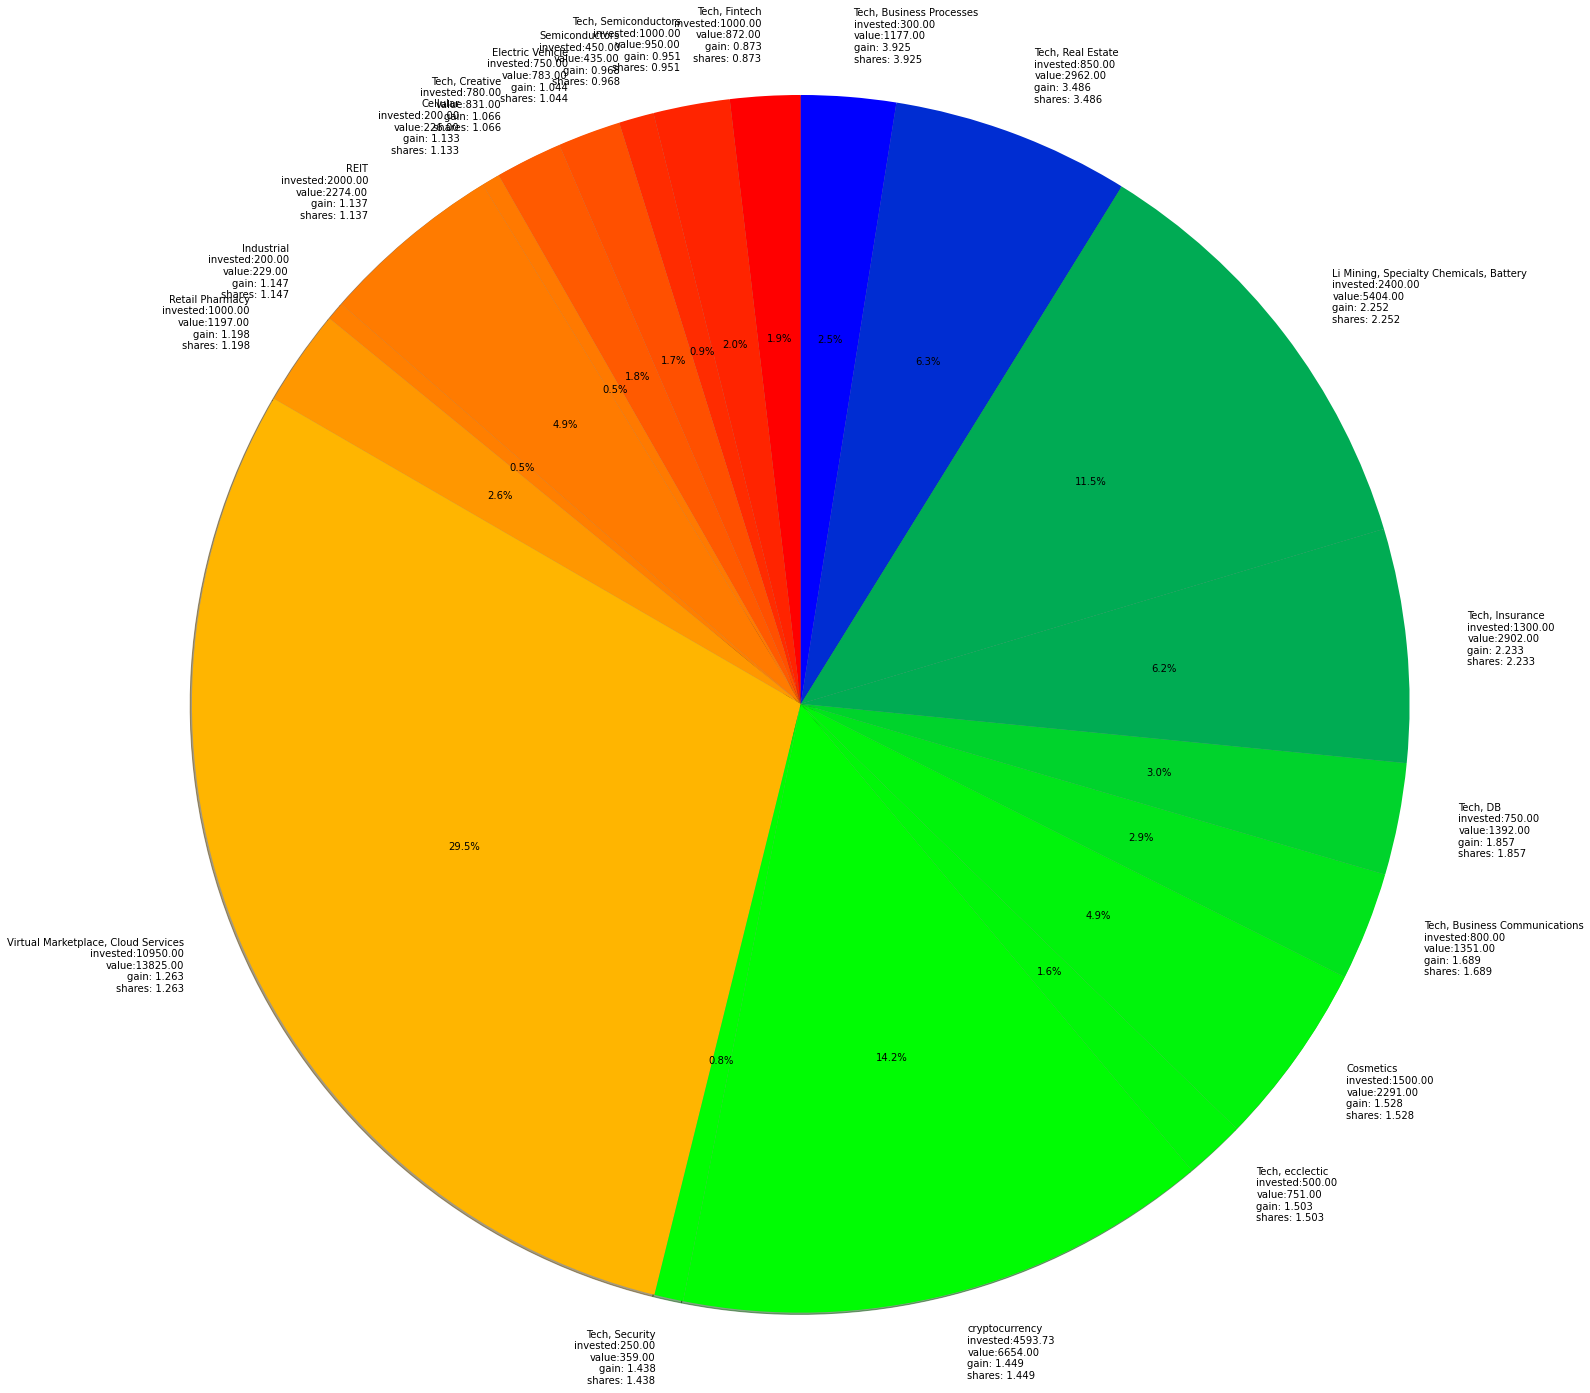

In [26]:
fig1, ax1 = plt.subplots()
df = sector_df
df = df.sort_values(by=['gain'])



label_ = list( map( disCap.mklab, df.sector, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [27]:
df.head(30)

,sector,invested,value,gain,percentage_value
12,"Tech, Fintech",1000.00,872.962391,0.872962,0.018622
16,"Tech, Semiconductors",1000.00,950.580252,0.950580,0.020278
7,Semiconductors,450.00,435.644065,0.968098,0.009293
2,Electric Vehicle,750.00,783.368128,1.044491,0.016711
10,"Tech, Creative",780.00,831.801982,1.066413,0.017744
0,Cellular,200.00,226.607111,1.133036,0.004834
5,REIT,2000.00,2274.579478,1.137290,0.048521
3,Industrial,200.00,229.467769,1.147339,0.004895
6,Retail Pharmacy,1000.00,1197.686362,1.197686,0.025549
18,"Virtual Marketplace, Cloud Services",10950.00,13825.942426,1.262643,0.294932


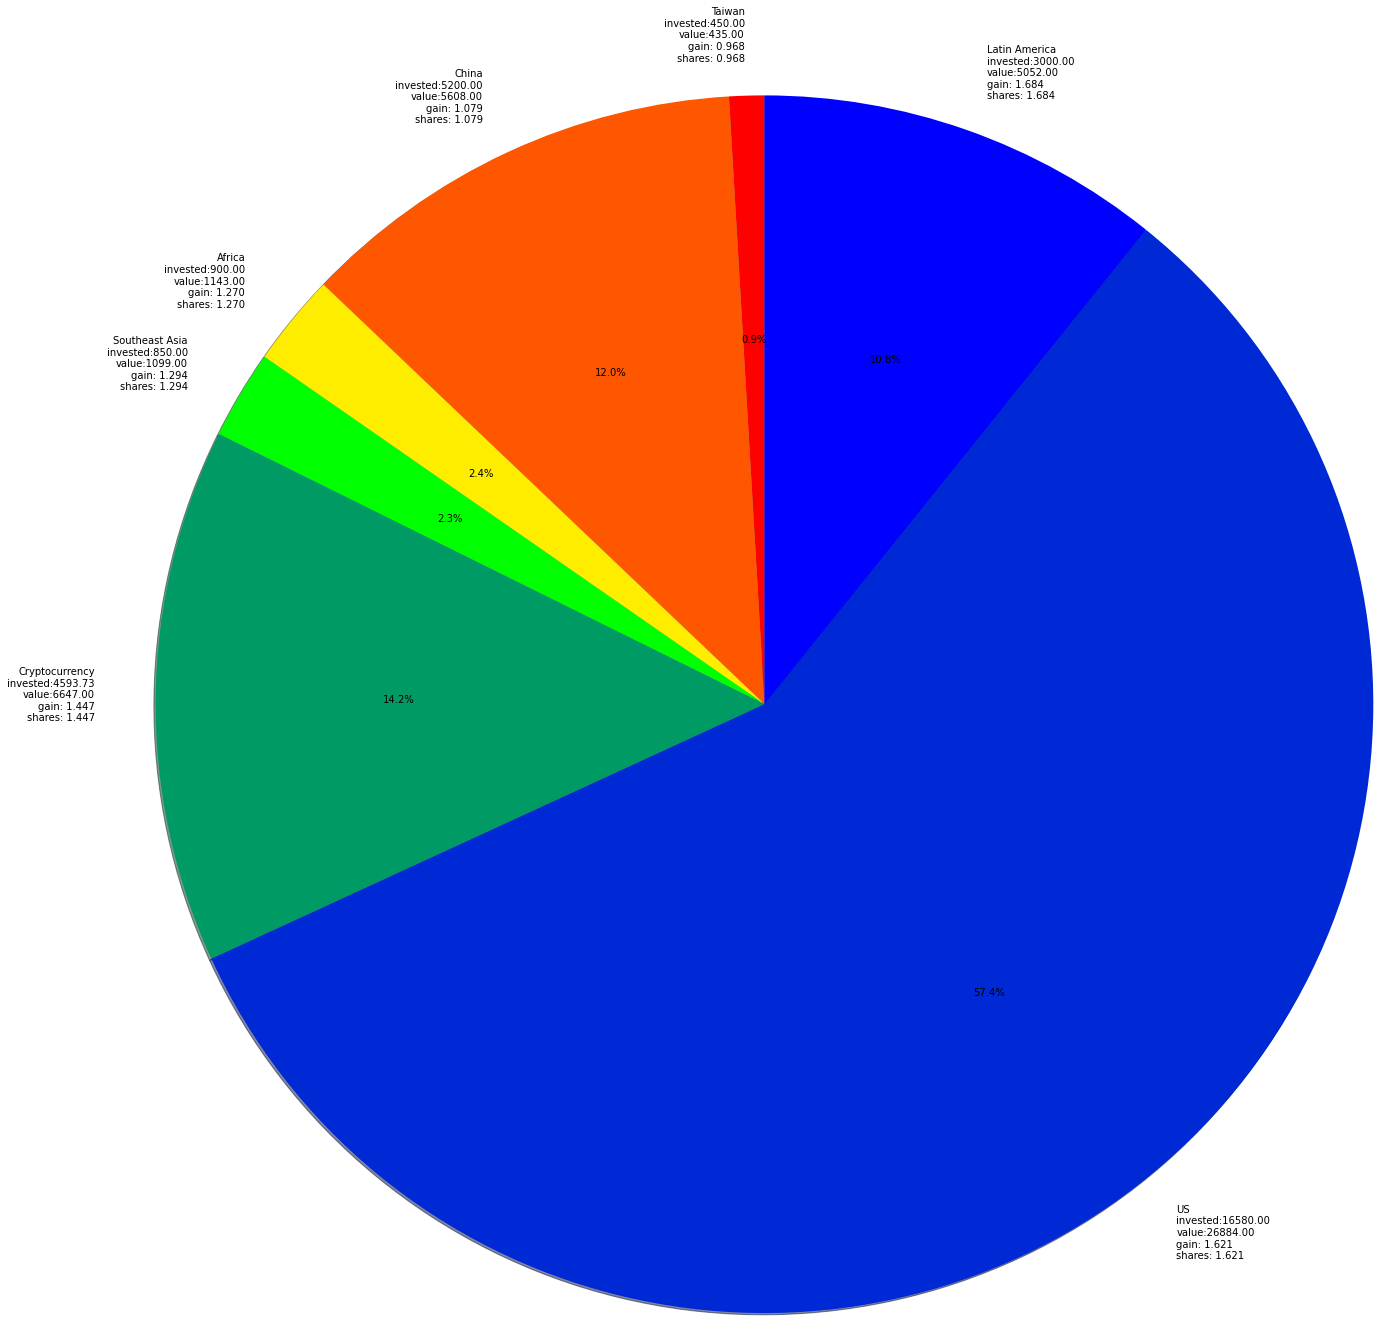

In [38]:
fig1, ax1 = plt.subplots()
df = area_df
df = df.sort_values(by=['gain'])

red_point = min(df.gain)
blue_point = max(df.gain)
green_point = np.median( df.gain )

label_ = list( map( disCap.mklab, df.area, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [39]:
df.head(30)

,area,invested,value,gain,percentage_value
5,Taiwan,450.00,435.644065,0.968098,0.929447
1,China,5200.00,5608.788852,1.078613,11.966350
0,Africa,900.00,1143.208605,1.270232,2.439035
4,Southeast Asia,850.00,1099.645624,1.293701,2.346094
2,Cryptocurrency,4593.73,6647.788885,1.447144,14.183056
6,US,16580.00,26884.052885,1.621475,57.357122
3,Latin America,3000.00,5052.213496,1.684071,10.778897


In [ ]:
# make time charts
showeach = 5
duration = '180d'
window = 5
symbol = 'SE'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

NIO


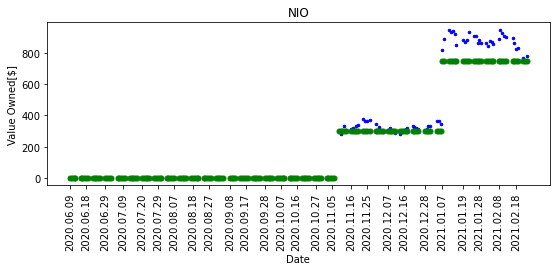

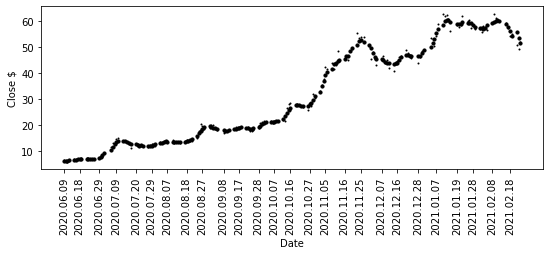

In [7]:
# make time charts
showeach = 7
duration = '180d'
window = 3
symbol = 'NIO'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

MELI


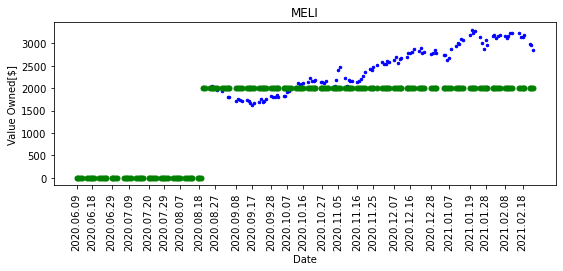

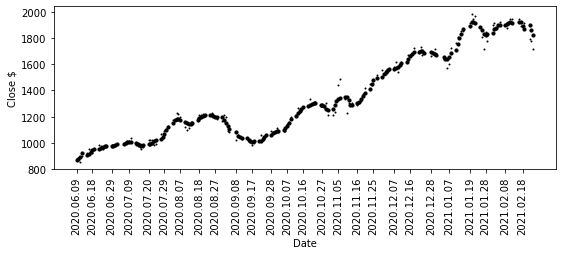

In [6]:
# make time charts
showeach = 7
duration = '180d'
window = 3
symbol = 'MELI'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

TSM


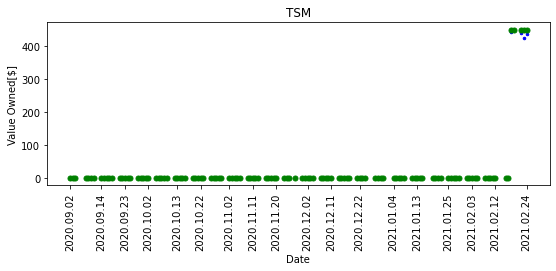

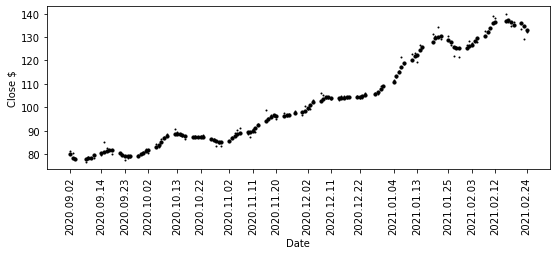

In [11]:
# make time charts
showeach = 7
duration = '120d'
window = 3
symbol = 'TSM'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

TSM


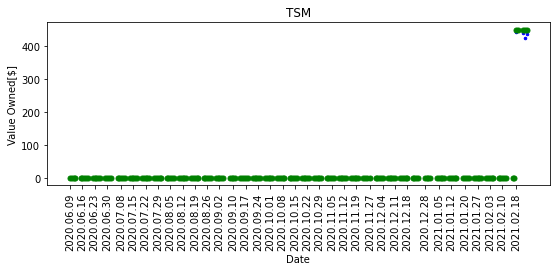

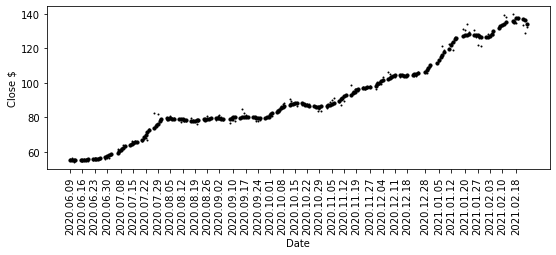

PYPL


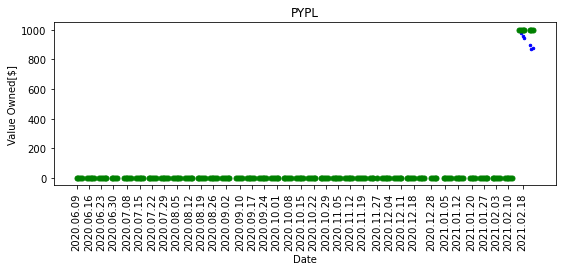

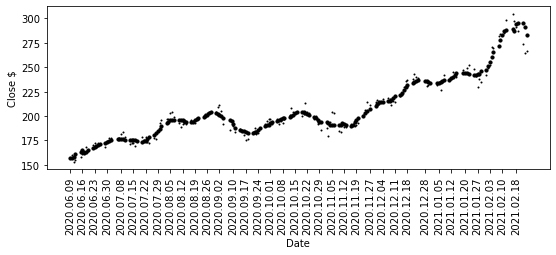

AMD


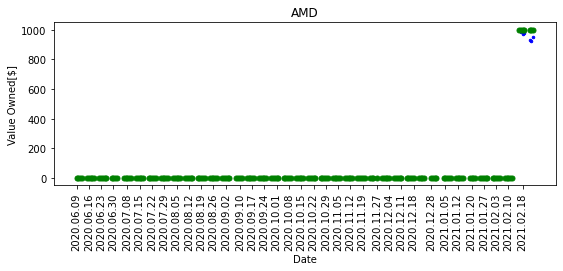

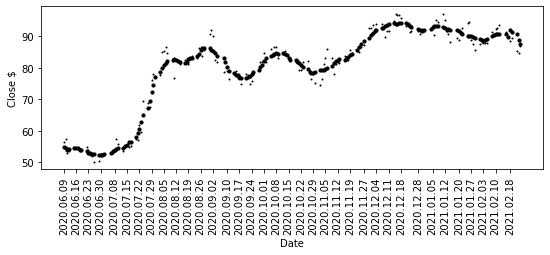

SE


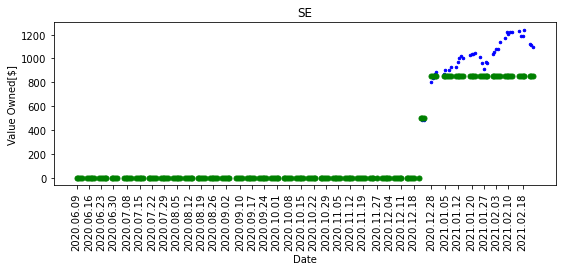

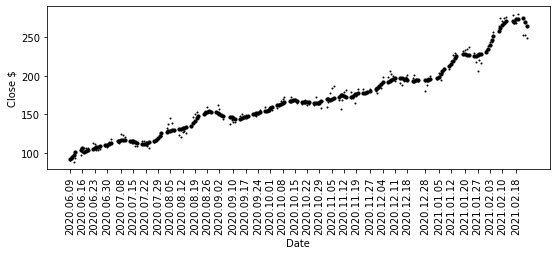

JMIA


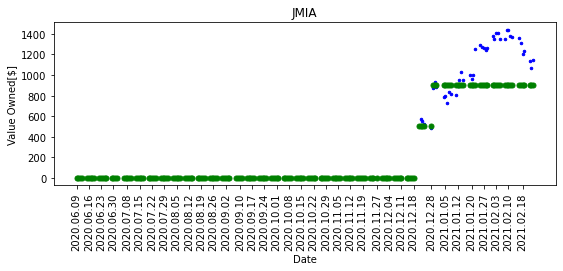

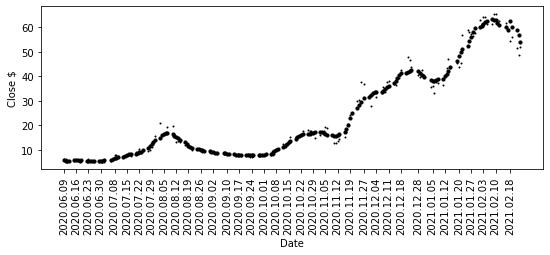

ESTC


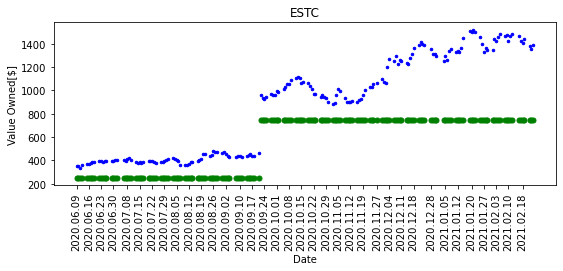

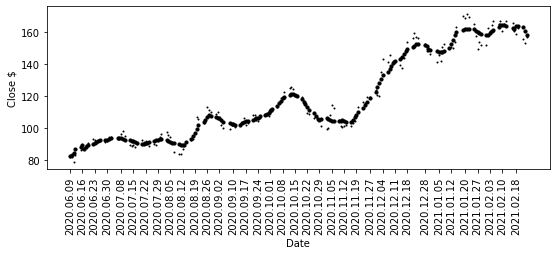

In [41]:
# make time charts
showeach = 5
duration = '180d'
window = 5
s = ['TSM','PYPL','AMD','SE', 'JMIA', 'ESTC']

for symbol in s:
    print(symbol)
    df = disCap.get_stock_data(symbol,duration)
    df = disCap.add_investments(df,investments,symbol)
    title_string = symbol
    #doubleplot(df, showeach, title_string, window)
    disCap.doubleplot_(df, showeach, title_string, window)